In [ ]:


from sympy.printing.pytorch import torch

torch.__version__

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data.ndim

In [ ]:
rand_tens = torch.rand(size=(2, 2, 3))
rand_tens, rand_tens.dtype

In [ ]:
range_tens = torch.arange(start=2, end=18, step=1).reshape(2, 2, 4)
range_tens, range_tens.dtype

In [ ]:
float_32_tensor = torch.tensor([3.0, 6, 9],
                               dtype=torch.double,
                               device=torch.device('cuda'),
                               requires_grad=False)

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

Operations

In [ ]:
tensor = torch.arange(start=5, end=10, step=2)
tensor.shape, tensor.dtype, tensor.device

In [ ]:
tensor = tensor - 10

In [ ]:
tensor

In [ ]:
mul_tens = torch.arange(2, 10, 2)
mul_tens

In [ ]:
mul_tens * mul_tens

In [ ]:
torch.matmul(mul_tens, mul_tens)

In [ ]:
a_tens = torch.arange(2, 8, 1).reshape(2, 3)
b_tens = torch.arange(8, 2, -1).reshape(3, 2)
print(a_tens, "\n", b_tens)
torch.mm(b_tens.T, a_tens.T)
a_tens.dtype

In [ ]:
torch.manual_seed(42)

a_tens = torch.arange(2, 8).reshape(2, 3).float()

linear = torch.nn.Linear(in_features=2, out_features=6)

output = linear(a_tens.T)

print(f"Input shape: {a_tens.shape}\n\n {a_tens}")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

In [ ]:
x = torch.arange(0, 100, 10)
x

In [ ]:
print(f"Minimum value: {min(x)}")
print(f"Maximum value: {max(x)}")
print(f"Mean value: {x.type(torch.float32).mean()}")
print(f"Standard deviation: {x.type(torch.float32).std()}")
print(f"Sum value: {sum(x)}")


In [ ]:
tensor = torch.arange(0, 100, 10)
tensor.dtype

In [ ]:
tensor_float32 = tensor.type(torch.float32)
tensor_float32.dtype

In [ ]:
tensor_float32 = torch.arange(0., 10., 1.)
tensor_float32.dtype, tensor_float32

In [ ]:
tensor = tensor_float32.type(torch.int32)
tensor, tensor.dtype

In [ ]:
X = tensor.view(1, 10).t()
X.is_contiguous()
y = X.view(2, 5)
tensor[5] = 50
y


In [ ]:
y[0][4] = 40
tensor

In [ ]:
tensor = torch.arange(0, 10, 1)
tensor

In [ ]:
stacked_tensor = torch.stack([tensor.view(2, 5), tensor.view(2, 5), tensor.view(2, 5)], dim=1)
stacked_tensor

In [ ]:
print(f"squeezed: {tensor.view(1, 1, 2, 5).squeeze()}")
tensor.view(1, 1, 2, 5)

In [ ]:
print(f"with many dimensions: {tensor.view(1, 1, 1, 10)}\ndim: {tensor.view(1, 1, 1, 10).ndim}")
print(f"squeezed: {tensor.view(1, 1, 1, 10).squeeze()}\ndim: {tensor.view(1, 1, 1, 10).squeeze().ndim}")

In [ ]:
print(f"original: {tensor}\ndim: {tensor.ndim}")
print(f"unsqueezed: {tensor.unsqueeze(dim=0)}\ndim: {tensor.unsqueeze(0).ndim}")

In [ ]:
tensor = torch.rand(size=(18, 42, 13, 28))
tensor.shape

In [ ]:
tensor_permuted = tensor.permute(3, 2, 1, 0)
tensor_permuted.shape

Randomness

In [ ]:
a_tensor = torch.rand(2, 3)
b_tensor = torch.rand(2, 3)

print(f"first tensor: {a_tensor}")
print(f"second tensor: {b_tensor}")
a_tensor == b_tensor

In [ ]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
c_tensor = torch.randn(size=(3, 4))

torch.manual_seed(RANDOM_SEED)
d_tensor = torch.randn(size=(3, 4))

print(f"third tensor: {c_tensor}")
print(f"fourth tensor: {d_tensor}")
c_tensor == d_tensor

In [ ]:
torch.cuda.device_count()
torch.cuda.is_available()

In [ ]:
tensor = torch.rand(size=(3, 4))
device = "cuda" if torch.cuda.is_available() else "cpu"
print(tensor, tensor.device, tensor.dtype)
tensor = tensor.to(device)
print(tensor, tensor.device, tensor.dtype)
tensor = tensor.cpu()
print(tensor, tensor.device, tensor.dtype)

In [ ]:
import torch
tensor = torch.rand(2, 2)
tensor

In [ ]:
torch.inverse(tensor)

In [ ]:
torch.det(tensor)

In [ ]:
tensor.sum(dim=0, keepdim=True)

In [ ]:
tensor.sum(dim=1, keepdim=True)

In [ ]:
tensor.flatten()

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

x, y

In [ ]:
z = x**2 + y**3
z, x, y

In [ ]:
z.backward()
x.grad, y.grad

In [ ]:
x.backward()
x

In [ ]:
y.backward()
y

In [ ]:
# x.grad.zero_()
x.grad.zero_()

In [ ]:
z = x**2 + y**3
z.backward()
print(x.grad)

In [ ]:
z = x**2 + y**3
z.backward()
print(x.grad)

In [37]:
import torch
import matplotlib.pyplot as plt
import numpy as np

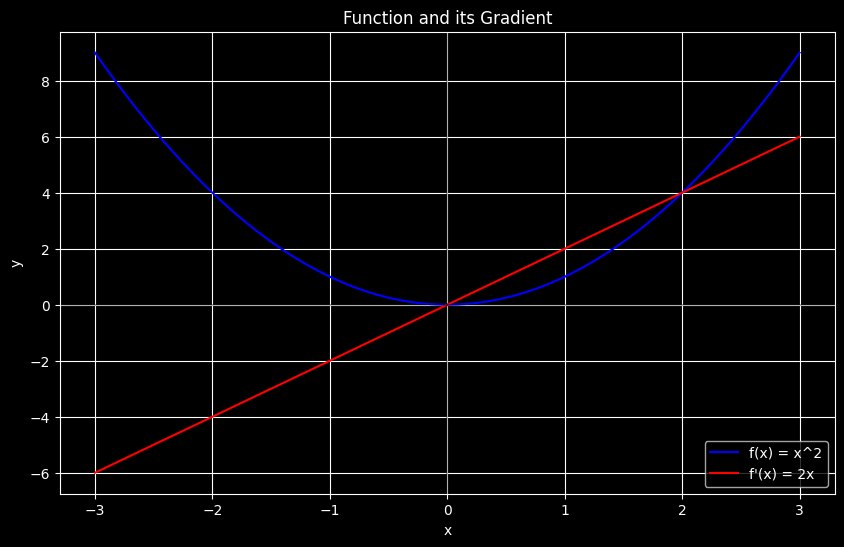

In [38]:
x_range = torch.linspace(-3, 3, 100, requires_grad=True)

y = x_range**2

gradients = []
for i in range(len(x_range)):
    if x_range.grad is not None:
        x_range.grad.zero_()
    y_i = x_range[i]**2
    y_i.backward(retain_graph=True)
    gradients.append(x_range.grad[i].item())

x_np = x_range.detach().numpy()
y_np = y.detach().numpy()
gradients_np = np.array(gradients)

plt.figure(figsize=(10, 6))
plt.plot(x_np, y_np, 'b-', label='f(x) = x^2')
plt.plot(x_np, gradients_np, 'r-', label="f'(x) = 2x")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Gradient')
plt.legend()
plt.show()

